In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
# import nibabel as nib

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

# Load prepared data

In [3]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [5]:
file_sphere = save_path+"fmap_mean_neg_amp_42.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'amp', 'neg', 'mean0', 'mean1', 'mean2', 'theory']
data = np.loadtxt(file_sphere);

In [8]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "amp":int, "neg": int})
df

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,42,1,0,0,0,2,0,0.0,0.0,0.0,0.578396
1,42,1,0,0,1,2,0,0.0,0.0,0.0,0.584610
2,42,1,0,0,2,2,0,0.0,0.0,0.0,0.590888
3,42,1,0,0,3,2,0,0.0,0.0,0.0,0.597230
4,42,1,0,0,4,2,0,0.0,0.0,0.0,0.603638
...,...,...,...,...,...,...,...,...,...,...,...
1081339,42,3,43,63,59,2,1,0.0,0.0,0.0,1.865481
1081340,42,3,43,63,60,2,1,0.0,0.0,0.0,1.910840
1081341,42,3,43,63,61,2,1,0.0,0.0,0.0,1.957465
1081342,42,3,43,63,62,2,1,0.0,0.0,0.0,2.005388


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081344 entries, 0 to 1081343
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   exp       1081344 non-null  int64  
 1   mini_exp  1081344 non-null  int64  
 2   i         1081344 non-null  int64  
 3   j         1081344 non-null  int64  
 4   k         1081344 non-null  int64  
 5   amp       1081344 non-null  int64  
 6   neg       1081344 non-null  int64  
 7   mean0     1081344 non-null  float64
 8   mean1     1081344 non-null  float64
 9   mean2     1081344 non-null  float64
 10  theory    1081344 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 90.8 MB


# Split data

## Data 1. fmap mean all experiments

In [11]:
df1_train = df[~((df['exp']==42) & ((df['mini_exp']==2) | (df['mini_exp']==3)))]
df1_val =  df[(df['exp']==42) & (df['mini_exp']==2)]
df1_test =  df[(df['exp']==42) & (df['mini_exp']==3)]

In [12]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(360448, 11)
(360448, 11)
(360448, 11)


In [17]:
df1_train.iloc[:, 6:-1]

,neg,mean0,mean1,mean2
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0
...,...,...,...,...
360443,1,0.0,0.0,0.0
360444,1,0.0,0.0,0.0
360445,1,0.0,0.0,0.0
360446,1,0.0,0.0,0.0


In [18]:
X1_train = df1_train.iloc[:, 6:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 6:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 6:-1].values 
y1_pred = df1_val['theory'].values

In [19]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(360448, 4)
(360448,)
(360448, 4)
(360448,)
(360448, 4)
(360448,)


## Data4: None zero

In [21]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0)]

In [22]:
df_nonzero

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
10074,42,1,2,29,26,2,0,-984.707153,-970.159729,-974.554504,0.798312
10076,42,1,2,29,28,2,0,-333.152374,-270.754669,-102.585724,0.819827
10137,42,1,2,30,25,2,0,-788.129700,-787.770996,-808.987488,0.786963
10138,42,1,2,30,26,2,0,-1038.672119,-1019.283020,-1018.710083,0.797582
13853,42,1,3,24,29,2,0,-352.913147,-328.458252,-345.069885,0.837726
...,...,...,...,...,...,...,...,...,...,...,...
1066912,42,3,40,30,32,2,1,531.209412,524.617249,528.361572,1.120325
1066965,42,3,40,31,21,2,1,-738.791687,-309.708313,248.529739,0.942770
1066966,42,3,40,31,22,2,1,-854.326355,-827.500061,-840.415222,0.957650
1067028,42,3,40,32,20,2,1,-524.266296,-949.864380,-932.718628,0.927170


In [23]:
df4_train = df_nonzero[~((df_nonzero['exp']==42) & ((df_nonzero['mini_exp']==2) | (df_nonzero['mini_exp']==3)))]
df4_test =  df_nonzero[(df_nonzero['exp']==42) & (df_nonzero['mini_exp']==2)]
df4_pred =  df_nonzero[(df_nonzero['exp']==42) & (df_nonzero['mini_exp']==3)]

In [24]:
X4_train = df4_train.iloc[:, 6:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 6:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 6:-1].values
y4_pred = df4_pred['theory'].values

In [26]:
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape) 
print(X4_pred.shape)
print(y4_pred.shape)

(54256, 4)
(54256,)
(54256, 4)
(54256,)
(54256, 4)
(54256,)


# Run NN

In [28]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [30]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mse"])

In [31]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_42.h5', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=[X_test, y_test], callbacks=[checkpointer])

In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
np.corrcoef(test_pred.flatten(), y_test)

In [ ]:
model.summary()

In [ ]:
history.history

## Plot

### Loss function (MSE)

In [ ]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

In [ ]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

# Output data

# Run NN for NonZero

In [34]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [35]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mse"])

In [36]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_42_nonzero.h5', verbose=1, save_best_only=True)

In [46]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=[X_test, y_test], callbacks=[checkpointer])

Epoch 1/300
843/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 1: val_loss improved from 0.01734 to 0.01733, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_42_nonzero.h5
848/848 [==============================] - 2s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 2/300
821/848 [============================>.] - ETA: 0s - loss: 0.0175 - mse: 0.0175
Epoch 2: val_loss did not improve from 0.01733
848/848 [==============================] - 1s 2ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 3/300
801/848 [===========================>..] - ETA: 0s - loss: 0.0207 - mse: 0.0207
Epoch 3: val_loss did not improve from 0.01733
848/848 [==============================] - 1s 2ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 4/300
840/848 [============================>.] - ETA: 0s - loss: 0.0185 - mse: 0.0185
Epoch 4: val_loss

848/848 [==============================] - 1s 2ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 32/300
842/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 32: val_loss did not improve from 0.01732
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 33/300
813/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 33: val_loss did not improve from 0.01732
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 34/300
814/848 [===========================>..] - ETA: 0s - loss: 0.0206 - mse: 0.0206
Epoch 34: val_loss did not improve from 0.01732
848/848 [==============================] - 1s 2ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 35/300
808/848 [===========================>..] - ETA: 0s - loss: 0.0178 - mse: 0.0178


848/848 [==============================] - 2s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 63/300
823/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 63: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 64/300
802/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 64: val_loss did not improve from 0.01731
848/848 [==============================] - 2s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 65/300
821/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 65: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 66/300
804/848 [===========================>..] - ETA: 0s - loss: 0.0184 - mse: 0.0184


Epoch 94/300
819/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 94: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 95/300
843/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 95: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 96/300
826/848 [============================>.] - ETA: 0s - loss: 0.0175 - mse: 0.0175
Epoch 96: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 97/300
805/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 97: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - m

799/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 125: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 126/300
800/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 126: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 127/300
812/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 127: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 128/300
806/848 [===========================>..] - ETA: 0s - loss: 0.0176 - mse: 0.0176
Epoch 128: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0176 - mse: 0.

800/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 156: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 157/300
817/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 157: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 158/300
820/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 158: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 159/300
806/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 159: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.

829/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 187: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 188/300
816/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 188: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 189/300
801/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 189: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 190/300
812/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 190: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.

796/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 218: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 219/300
848/848 [==============================] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 219: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 220/300
804/848 [===========================>..] - ETA: 0s - loss: 0.0179 - mse: 0.0179
Epoch 220: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 221/300
801/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 221: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.

833/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 249: val_loss did not improve from 0.01731
848/848 [==============================] - 2s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 250/300
825/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 250: val_loss did not improve from 0.01731
848/848 [==============================] - 2s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 251/300
840/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 251: val_loss did not improve from 0.01731
848/848 [==============================] - 2s 2ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 252/300
816/848 [===========================>..] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 252: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0174 - mse: 0.

811/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 280: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 281/300
814/848 [===========================>..] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 281: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 282/300
827/848 [============================>.] - ETA: 0s - loss: 0.0174 - mse: 0.0174
Epoch 282: val_loss did not improve from 0.01731
848/848 [==============================] - 2s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 283/300
833/848 [============================>.] - ETA: 0s - loss: 0.0173 - mse: 0.0173
Epoch 283: val_loss did not improve from 0.01731
848/848 [==============================] - 1s 2ms/step - loss: 0.0173 - mse: 0.

In [47]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

1696/1696 [==============================] - 1s 693us/step
0.017336122938802923
0.11153647488828944
1696/1696 [==============================] - 1s 690us/step
0.017568773611605037
0.11164505975978797


In [48]:
model.evaluate(X_test, y_test)

1696/1696 [==============================] - 1s 787us/step - loss: 0.0176 - mse: 0.0176


[0.01756878010928631, 0.01756878010928631]

In [49]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.01459331],
       [0.01459331, 1.        ]])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [50]:
history.history

{'loss': [0.017412154003977776,
  0.01745527982711792,
  0.020502636209130287,
  0.01845235377550125,
  0.017491541802883148,
  0.017568254843354225,
  0.017568467184901237,
  0.017501942813396454,
  0.017383545637130737,
  0.018518580123782158,
  0.017336400225758553,
  0.017528321593999863,
  0.017618738114833832,
  0.017364483326673508,
  0.018170535564422607,
  0.01734144240617752,
  0.01736733317375183,
  0.017332125455141068,
  0.018134094774723053,
  0.01756437122821808,
  0.017333585768938065,
  0.01842622086405754,
  0.017916390672326088,
  0.017631376162171364,
  0.018152352422475815,
  0.017534272745251656,
  0.017458802089095116,
  0.028800196945667267,
  0.018195824697613716,
  0.01751874014735222,
  0.020862704142928123,
  0.017375728115439415,
  0.017332162708044052,
  0.020421279594302177,
  0.017750779166817665,
  0.01733609288930893,
  0.017422884702682495,
  0.018091842532157898,
  0.01747754029929638,
  0.017569344490766525,
  0.01757424883544445,
  0.01914637908339

## Plot

### Loss function (MSE)

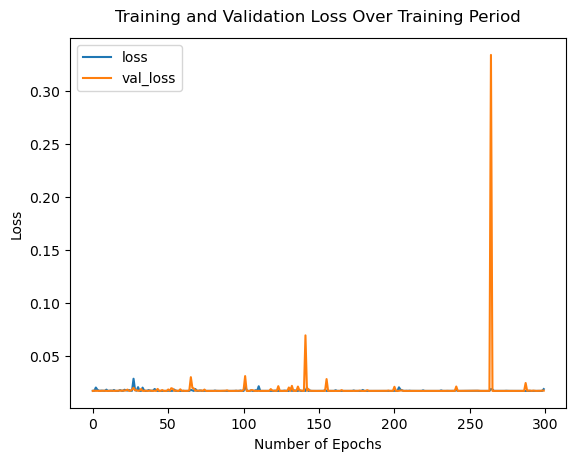

In [51]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

# Plot

### Theory vs Predict

In [52]:
test_pred = model.predict(X4_pred)

1696/1696 [==============================] - 1s 677us/step


r: 0.01523, st_er: 0.000343
y = 0.0012*x + 0.9818


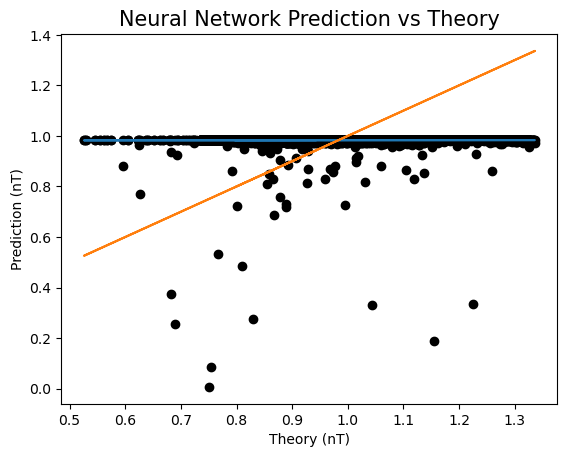

In [66]:
x = y4_pred.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y4_pred, test_pred,  color='black')
# plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [54]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_15935/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [55]:
df4_pred

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
730970,42,3,2,29,26,2,0,-943.760986,-940.001038,-946.072876,0.798312,0.983463
730972,42,3,2,29,28,2,0,-560.983154,-167.993820,-76.056984,0.819827,0.983463
731033,42,3,2,30,25,2,0,-763.589050,-740.604675,-767.269226,0.786963,0.983463
731034,42,3,2,30,26,2,0,-993.368958,-994.284729,-993.848022,0.797582,0.983463
734749,42,3,3,24,29,2,0,-327.346069,-303.126373,-316.548706,0.837726,0.983463
...,...,...,...,...,...,...,...,...,...,...,...,...
1066912,42,3,40,30,32,2,1,531.209412,524.617249,528.361572,1.120325,0.983463
1066965,42,3,40,31,21,2,1,-738.791687,-309.708313,248.529739,0.942770,0.983463
1066966,42,3,40,31,22,2,1,-854.326355,-827.500061,-840.415222,0.957650,0.983463
1067028,42,3,40,32,20,2,1,-524.266296,-949.864380,-932.718628,0.927170,0.815558


In [56]:
df1_test

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
720896,42,3,0,0,0,2,0,0.0,0.0,0.0,0.578396
720897,42,3,0,0,1,2,0,0.0,0.0,0.0,0.584610
720898,42,3,0,0,2,2,0,0.0,0.0,0.0,0.590888
720899,42,3,0,0,3,2,0,0.0,0.0,0.0,0.597230
720900,42,3,0,0,4,2,0,0.0,0.0,0.0,0.603638
...,...,...,...,...,...,...,...,...,...,...,...
1081339,42,3,43,63,59,2,1,0.0,0.0,0.0,1.865481
1081340,42,3,43,63,60,2,1,0.0,0.0,0.0,1.910840
1081341,42,3,43,63,61,2,1,0.0,0.0,0.0,1.957465
1081342,42,3,43,63,62,2,1,0.0,0.0,0.0,2.005388


In [57]:
df1_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_15935/549603398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['predict'] = 0.00


In [58]:
df_out = df1_test[['i', 'j', 'k', 'neg', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'neg', 'predict']]

In [59]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360448 entries, 720896 to 1081343
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        360448 non-null  int64  
 1   j        360448 non-null  int64  
 2   k        360448 non-null  int64  
 3   neg      360448 non-null  int64  
 4   predict  360448 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 16.5 MB


In [60]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    neg = df_pre.iloc[x, :]['neg'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k) & (df_out['neg']==neg)].index
    df_out.loc[idx, 'predict']= pred

In [61]:
df_pre

,i,j,k,neg,predict
730970,2,29,26,0,0.983463
730972,2,29,28,0,0.983463
731033,2,30,25,0,0.983463
731034,2,30,26,0,0.983463
734749,3,24,29,0,0.983463
...,...,...,...,...,...
1066912,40,30,32,1,0.983463
1066965,40,31,21,1,0.983463
1066966,40,31,22,1,0.983463
1067028,40,32,20,1,0.815558


In [67]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,neg,predict
751656,7,32,40,0,0.983463
931880,7,32,40,1,0.983463


In [63]:
df_out

,i,j,k,neg,predict
720896,0,0,0,0,0.0
720897,0,0,1,0,0.0
720898,0,0,2,0,0.0
720899,0,0,3,0,0.0
720900,0,0,4,0,0.0
...,...,...,...,...,...
1081339,43,63,59,1,0.0
1081340,43,63,60,1,0.0
1081341,43,63,61,1,0.0
1081342,43,63,62,1,0.0


In [64]:
df_pos = df_out[df_out['neg']==0]
df_neg = df_out[df_out['neg']==1]

In [65]:
np.savetxt(img_path+"nn_neg_42_nonzero_pos.txt", df_pos[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_neg_42_nonzero_neg.txt", df_neg[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")